# Problem Statement 🍕
Kanav has started his own Pizza Store by getting the Franchise from the popular Pizza brand Diminos. 
Diminos promises to deliver the pizza order within 31 minutes from the time the order was placed. Otherwise the pizza will be free for the customer.
In order to increase the revenue and profits Kanav is running the store 24 * 7.
Recently Diminos gave a notice to Kanav that they will be measuring their stores' performance by looking at the metric - which is 95th Percentile on Order Delivery time should be less than 31 mins.
Kanav is worried that he might lose the franchise if he is not able to meet the metric and wants your help in order to understand his store's performance so that he can take some actions to prevent his business. 


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import io
import requests
from datetime import datetime

### Loading the dataset

In [2]:
df=pd.read_csv("diminos_data.csv")

### Understanding the dataset

In [3]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [5]:
df.isna().any()

order_id              False
order_placed_at       False
order_delivered_at    False
dtype: bool

In [6]:
df.duplicated().sum()

0

In [7]:
# Convert the "order_delivered_at" column to a pandas datetime object
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
# Calculate the delivery time as a timedelta object
df["delivery_time"] = df["order_delivered_at"] - df["order_placed_at"]


In [8]:
# Print the first few rows of the modified DataFrame to check the results
df.head(5)

,order_id,order_placed_at,order_delivered_at,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056


In [9]:
durations=df['delivery_time']
# Convert the Series object to a Timedelta object
timedeltas = pd.to_timedelta(durations)

# Calculate the total number of seconds in each Timedelta object
seconds = timedeltas.dt.total_seconds()

# Print the resulting Series object of seconds
print(seconds)

0        1028.443132
1         935.925241
2         906.291385
3        2312.019399
4         970.619056
            ...     
14995     932.409378
14996    1004.672912
14997     924.676238
14998     957.810358
14999     922.499311
Name: delivery_time, Length: 15000, dtype: float64


In [10]:
# Extract the total seconds from the timedelta object to calculate the difference in minutes
min_diff = seconds / 60

# Print the result
print(f"The time difference is {min_diff} hours")



The time difference is 0        17.140719
1        15.598754
2        15.104856
3        38.533657
4        16.176984
           ...    
14995    15.540156
14996    16.744549
14997    15.411271
14998    15.963506
14999    15.374989
Name: delivery_time, Length: 15000, dtype: float64 hours


In [11]:
df['delivery_time_min']=min_diff

In [12]:
df.head(5)

,order_id,order_placed_at,order_delivered_at,delivery_time,delivery_time_min
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056,16.176984


In [13]:
df.tail(5)

,order_id,order_placed_at,order_delivered_at,delivery_time,delivery_time_min
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,0 days 00:15:32.409378,15.540156
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,0 days 00:16:44.672912,16.744549
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,0 days 00:15:24.676238,15.411271
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,0 days 00:15:57.810358,15.963506
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311,0 days 00:15:22.499311,15.374989


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order_id            15000 non-null  int64          
 1   order_placed_at     15000 non-null  datetime64[ns] 
 2   order_delivered_at  15000 non-null  datetime64[ns] 
 3   delivery_time       15000 non-null  timedelta64[ns]
 4   delivery_time_min   15000 non-null  float64        
dtypes: datetime64[ns](2), float64(1), int64(1), timedelta64[ns](1)
memory usage: 586.1 KB


In [15]:
df.describe()

,order_id,delivery_time,delivery_time_min
count,1.500000e+04,15000,15000.000000
mean,1.530610e+06,0 days 00:20:29.963359588,20.499389
std,4.330271e+03,0 days 01:36:09.621708129,96.160362
min,1.523111e+06,0 days 00:15:00.000620,15.000010
25%,1.526861e+06,0 days 00:15:16.489559750,15.274826
50%,1.530610e+06,0 days 00:15:47.879164,15.797986
75%,1.534360e+06,0 days 00:17:16.779654250,17.279661
max,1.538110e+06,5 days 01:39:49.882496,7299.831375


### Calculate the proportion of orders delivered within 31 minutes

In [16]:
#Mean
prop_on_time = (df["delivery_time_min"] <= 31).mean()
print(f"Proportion of orders delivered on time: {prop_on_time:.2f}")

Proportion of orders delivered on time: 0.96


In [17]:
#Median
prop_on_time_med = (df["delivery_time_min"] <= 31).median()
print(f"Proportion of orders delivered on time: {prop_on_time_med:.2f}")

Proportion of orders delivered on time: 1.00


In [18]:
# Calculate the 95th percentile delivery time
pct_95 = np.percentile(df["delivery_time_min"], 95)
print(f"The 95th percentile delivery time is {pct_95:.2f} minutes.")


The 95th percentile delivery time is 27.26 minutes.


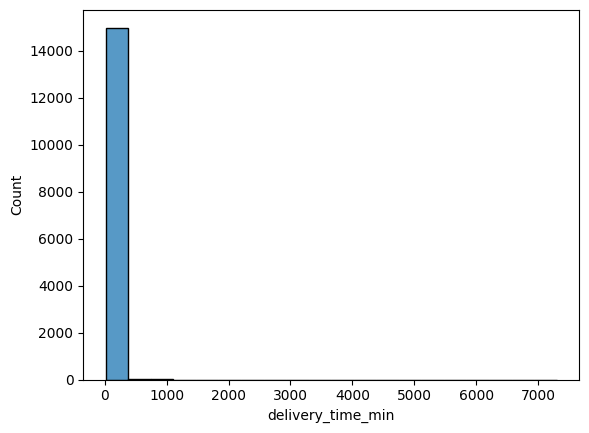

In [19]:
# Create a histogram of delivery time in minutes
sns.histplot(data=df, x="delivery_time_min", bins=20)
plt.show()

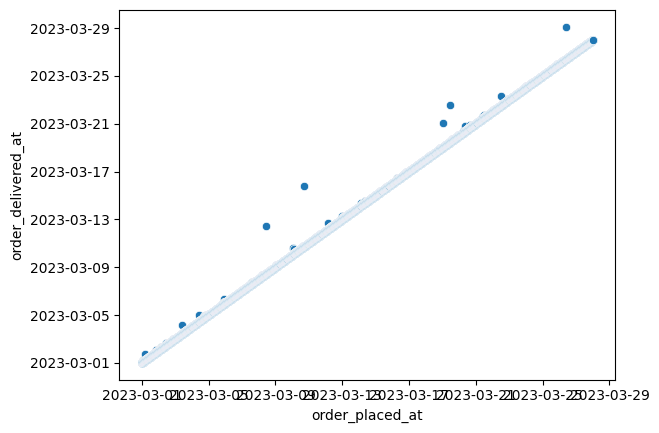

In [20]:
# Create a scatter plot of ordered time and delivery time
sns.scatterplot(x="order_placed_at", y="order_delivered_at", data=df)
plt.show()

In [21]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at', 'delivery_time',
       'delivery_time_min'],
      dtype='object')

In [22]:
# Calculate the average delivery time
avg_delivery_time = df['delivery_time'].mean()

print('Average delivery time:', avg_delivery_time)

Average delivery time: 0 days 00:20:29.963359588


In [23]:
# Calculate the distribution of delivery times
delivery_time_counts = df['delivery_time'].value_counts()
print('Distribution of delivery times:')
print(delivery_time_counts)


Distribution of delivery times:
0 days 00:15:08.404902    2
0 days 00:15:19.540442    2
0 days 00:15:02.045940    2
0 days 00:17:08.443132    1
0 days 00:15:55.339759    1
                         ..
0 days 00:17:19.989206    1
0 days 00:22:05.852398    1
0 days 00:15:11.178449    1
0 days 00:17:17.382379    1
0 days 00:15:22.499311    1
Name: delivery_time, Length: 14997, dtype: int64


In [24]:
# Convert timestamp column to datetime object
df['Timestamp'] = pd.to_datetime(df['order_delivered_at'])

# Create new columns for Day_of_Week and hour of day
df['Day_of_Week'] = df['Timestamp'].dt.day_name()
df['Hour_of_Day'] = df['Timestamp'].dt.hour

In [25]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at', 'delivery_time',
       'delivery_time_min', 'Timestamp', 'Day_of_Week', 'Hour_of_Day'],
      dtype='object')

In [26]:
# Group data by Day_of_Week and calculate average delivery time
avg_delivery_by_day = df.groupby('Day_of_Week')['delivery_time'].mean()

# Group data by hour of day and calculate average delivery time
avg_delivery_by_hour = df.groupby('Hour_of_Day')['delivery_time'].mean()



In [27]:
print('Average delivery time by Day_of_Week:\n', avg_delivery_by_day)


Average delivery time by Day_of_Week:
 Day_of_Week
Friday      0 days 00:18:21.693175465
Monday      0 days 00:19:39.828267090
Saturday    0 days 00:19:04.700017610
Sunday      0 days 00:20:56.470640143
Thursday    0 days 00:19:07.148800034
Tuesday     0 days 00:21:03.939860433
Wednesday   0 days 00:25:23.424147946
Name: delivery_time, dtype: timedelta64[ns]


In [28]:
print('Average delivery time by hour of day:\n', avg_delivery_by_hour)

Average delivery time by hour of day:
 Hour_of_Day
0    0 days 00:22:39.624245873
1    0 days 00:19:12.163455964
2    0 days 00:24:40.970663674
3    0 days 00:21:22.323832919
4    0 days 00:18:09.097457098
5    0 days 00:18:45.555406673
6    0 days 00:17:53.074213582
7    0 days 00:19:09.584447988
8    0 days 00:20:59.029055442
9    0 days 00:17:11.052741163
10   0 days 00:18:16.200512096
11   0 days 00:28:48.054191877
12   0 days 00:18:15.317354080
13   0 days 00:25:37.617446811
14   0 days 00:19:21.973045491
15   0 days 00:18:44.616275742
16   0 days 00:18:58.502481193
17   0 days 00:19:12.248011379
18   0 days 00:32:28.514971542
19   0 days 00:17:35.503885898
20   0 days 00:18:07.023035876
21   0 days 00:18:23.607532897
22   0 days 00:18:58.420801695
23   0 days 00:19:30.880606561
Name: delivery_time, dtype: timedelta64[ns]


In [29]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at', 'delivery_time',
       'delivery_time_min', 'Timestamp', 'Day_of_Week', 'Hour_of_Day'],
      dtype='object')

In [30]:
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time,delivery_time_min,Timestamp,Day_of_Week,Hour_of_Day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132,17.140719,2023-03-01 00:18:07.443132,Wednesday,0
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241,15.598754,2023-03-01 00:19:34.925241,Wednesday,0
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385,15.104856,2023-03-01 00:22:28.291385,Wednesday,0
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399,38.533657,2023-03-01 00:46:19.019399,Wednesday,0
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056,16.176984,2023-03-01 00:25:13.619056,Wednesday,0


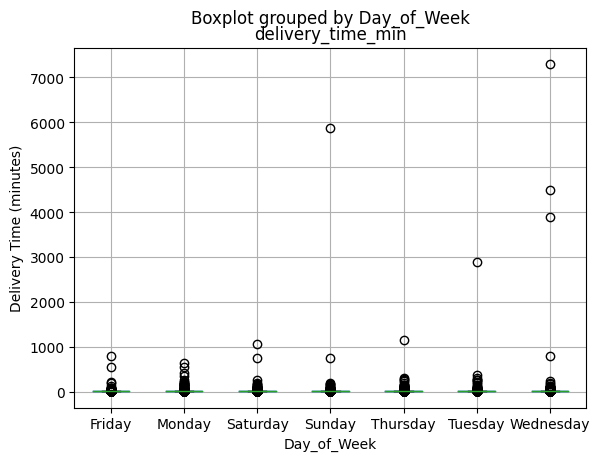

In [31]:
# Create a boxplot to compare delivery times across different categories, such as day of the week or time of day
df.boxplot(column='delivery_time_min', by='Day_of_Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()

In [32]:
# Group the data by day of the week
grouped_data = df.groupby('Day_of_Week')

In [33]:
# Define a function to identify and remove outliers for each group
def remove_outliers(group):
    # Calculate the z-scores for each point in the group
    z_scores = zscore(group['delivery_time_min'])
    # Identify the indices of points that are more than 3 standard deviations from the mean
    abs_z_scores = np.abs(z_scores)
    outliers = abs_z_scores > 3
    # Remove the outliers from the group
    filtered_data = group[~outliers]
    return filtered_data

In [34]:
# Apply the remove_outliers function to each group
filtered_data = grouped_data.apply(remove_outliers)

<Axes: xlabel='Day_of_Week', ylabel='delivery_time_min'>

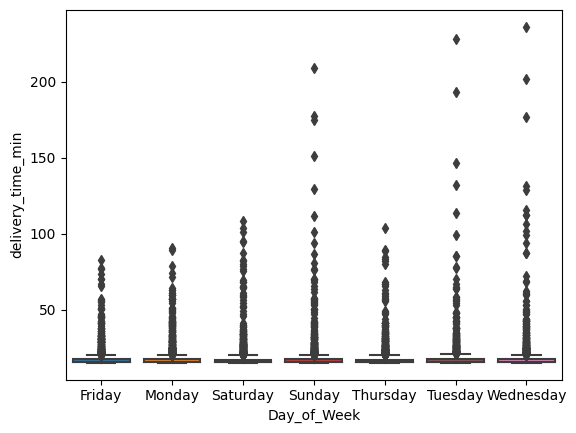

In [35]:
# Visualize the filtered data using a boxplot
sns.boxplot(x='Day_of_Week', y='delivery_time_min', data=filtered_data)

<Axes: xlabel='delivery_time_min', ylabel='Density'>

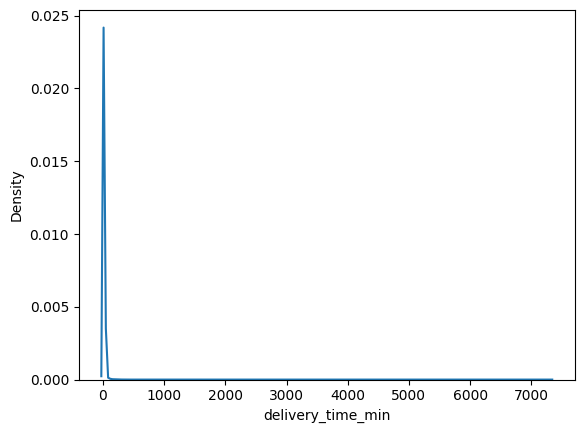

In [36]:
# Create a KDE plot for the delivery time data
sns.kdeplot(df['delivery_time_min'])

<Axes: xlabel='Day_of_Week', ylabel='delivery_time_min'>

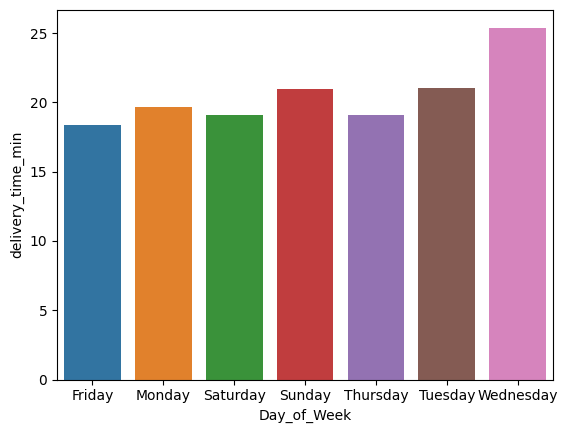

In [37]:

# Calculate the mean delivery time for each day of the week
mean_delivery_time_by_day = df.groupby('Day_of_Week')['delivery_time_min'].mean().reset_index()

# Create a barplot to display the mean delivery time for each day of the week
sns.barplot(x='Day_of_Week', y='delivery_time_min', data=mean_delivery_time_by_day)